# One dimensional optimization

## Fibonacci method

In [8]:
# from colab
! wget https://raw.githubusercontent.com/Egor200313/optimization/master/one_dim/optimizer.py -nc

--2022-11-09 13:54:12--  https://raw.githubusercontent.com/Egor200313/optimization/master/one_dim/optimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 916 [text/plain]
Saving to: ‘optimizer.py’

optimizer.py        100%[===================>]     916  --.-KB/s    in 0s      

2022-11-09 13:54:12 (48.1 MB/s) - ‘optimizer.py’ saved [916/916]



In [9]:
import numpy as np
import matplotlib.pyplot as plt

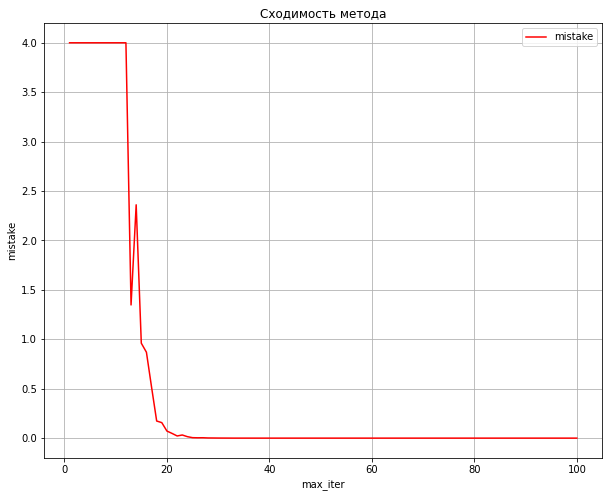

In [22]:
from optimizer import optimize_one_dim

def f(x):
  return (x - 4.0)**2 + 2.0

N = 100
mistake = []
for iterations in range(1, N + 1):
  point = optimize_one_dim(0.0, 1000.0, 0.0, iterations, f)
  mis = abs(4.0 - point)
  mistake.append(mis)

plt.figure(figsize=(10,8))
plt.title("Сходимость метода")
plt.plot(np.arange(1, N + 1), mistake, c='red', label="mistake")
plt.xlabel("max_iter")
plt.ylabel("mistake")
plt.legend()
plt.grid()
plt.show()